In [1]:
import tensorflow as ts
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [4]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#check shape of the train and test
xtrain.shape #RGB

(50000, 32, 32, 3)

In [6]:
#look a first image in array
xtrain[10]#0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

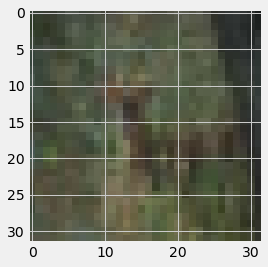

In [7]:
img0=plt.imshow(xtrain[10])

In [8]:
#get image label
lab1=ytrain[10]
print(lab1)

[4]


In [9]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
print('image class is:',classification[ytrain[10][0]])

image class is: deer


In [11]:
#change the label into set of numbers [10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [12]:
ytest_one_hot  #000100000 #000100000

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
print('one hot label:',ytrain_one_hot[10])

one hot label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [16]:
for x in xtrain:
    print('______')

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [14]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [15]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))


#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              801000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)             

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=1,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/1
40000/40000 [==============================] - 67s 2ms/step - loss: 1.8117 - accuracy: 0.3173 - val_loss: 1.4706 - val_accuracy: 0.4541


In [19]:
model.evaluate(xtest,ytest_one_hot)

10000/10000 [==============================] - 5s 507us/step


[1.454487942504883, 0.45890000462532043]

In [20]:
cat=plt.imread('index.jpg')

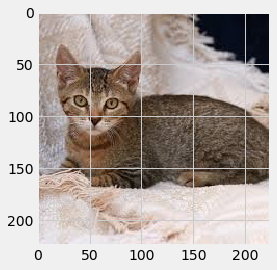

In [22]:
img=plt.imshow(cat)

In [23]:
#resize the image
#!pip install scikit-image
from skimage import transform

In [ ]:
!pip install scikit-image

In [24]:
resize=transform.resize(cat,(32,32,3))

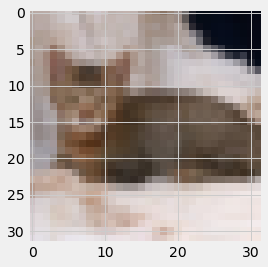

In [25]:
img=plt.imshow(resize)

In [26]:
prediction=modelp.redict(np.array([resize]))
print(prediction)

[[0.04870271 0.10126913 0.06638429 0.14955702 0.06922574 0.11412182
  0.156415   0.09348584 0.03207069 0.16876775]]


In [27]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[9, 6, 3, 5, 1, 7, 4, 2, 0, 8]


In [28]:
 for i in range(5):
        print(classification[list_index[i]])

truck
frog
cat
dog
automobile


In [2]:
for i in range(10):
    for j in range(10):
        print(j)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
